x is the one-dimensional underlying feature that characterizes one example, this feature can take only 2 possible noisy values (0 + epsilon) or (30 + epsilon), where epsilon determines the training set distribution and belongs to (-10,10) uniformly distributed.

a neuron in the first layer has as an output (before the ReLU): \sum_i w_i * (x  + epsilon_i) + b = x(\sum_i w_i) + \sum_i w_i*epsilon_i + b

for large dimensions we can assume that w and epsilon are uncorrelated, ie \sum_i w_i*epsilon_i = 0, and as a result, the output of a neuron before the ReLU is:
x(\sum_i w_i)  + b
So, the relu unit becomes active at - b/(\sum_i w_i)

I would display:
- each neuron in a line by representing b/(\sum_i w_i), this will tell us how the hyperplanes of the network are distributed in the relevant one-dimensional direction
- verifying that \sum_i w_i*epsilon_i = 0 for each neuron. it could be that the adversarial samples find epsilons that are highly correlated with w_i and when it is higher dimensional those are more feasible to be hidden randomly but possible to be calculated.

In [1]:
%matplotlib inline

In [2]:
import pickle
import torch
import torch.nn as nn
import numpy as np

import utils
from utils import CMA_info
from utils import MLP

In [4]:
with open('../data_dimension_experiment_10_repeats.p','rb') as F:
    all_info = pickle.load(F)

In [5]:
with open('good_attack_info_3.p','rb') as F:
    all_info = pickle.load(F)

In [6]:
len(all_info[1].starts)

10

In [7]:
len(all_info[1].in_dist_advs)

10

In [8]:
model = all_info[0]

good_samples = torch.vstack(all_info[1].starts)

bad_samples = torch.from_numpy(np.vstack(all_info[1].in_dist_advs)).float()

In [11]:
# layer_1 = model.layers[0]

# neuron_i = layer_1.weight[10]

# torch.dot(good_samples[0],layer_1.weight[0])

# layer_1.bias[0]

# layer_1(good_samples[0])[0]

# import matplotlib.pyplot as plt

# # plt.hist(weights[0].detach(),bins=2)
# # plt.show()

# torch.max(weights[0])

# torch.min(weights[0])

# np_weights = np.array(weights[0].detach())

# binwidth = 0.005

# plt.hist(np_weights, bins=np.arange(min(np_weights), max(np_weights) + binwidth, binwidth))
# plt.show()

# Find imortant direction?

In [12]:
torch.set_printoptions(sci_mode=False)

In [13]:
print(good_samples[0])

tensor([-0.2820, -0.0743, -0.5994])


In [14]:
print(bad_samples[0].float())

tensor([0.7199, 1.9314, 0.0038])


#### Ideas

- Largest elements of good
- Largest elements of bad
- Elements with greatest change
- Replace one at a time and see drop in probability
- Replace two at a time and see drop in probability

In [15]:
sample_id = 5

In [16]:
### Largest elements of good replaced by bad
for num_replace in range(0,105,5):
    good_sample_copy = good_samples[sample_id].clone()
    

    bad_sample_copy = bad_samples[sample_id].clone()
    k_indices = good_sample_copy.topk(num_replace).indices
    for i in k_indices:
        good_sample_copy[i] = bad_sample_copy[i]

    print(torch.argmax(model(good_sample_copy.unsqueeze(0))))

tensor(0)


RuntimeError: selected index k out of range

In [21]:
### Random elements of good replaced by bad

for num_replace in range(0,105,5):
    good_sample_copy = good_samples[sample_id].clone()
    bad_sample_copy = bad_samples[sample_id].clone()
    
    k_indices = torch.from_numpy(np.random.choice(range(100), num_replace, replace=False))
    for i in k_indices:
        good_sample_copy[i] = bad_sample_copy[i]

    print(torch.argmax(model(good_sample_copy.unsqueeze(0))))

tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(1)


Fails only at really large number of dims replaced, wow.


In [24]:
### Largest elements of bad replaced by good
for num_replace in range(0,20,1):
    good_sample_copy = good_samples[sample_id].clone()
    bad_sample_copy = bad_samples[sample_id].clone()
    
    k_indices = bad_sample_copy.topk(num_replace).indices
    for i in k_indices:
        bad_sample_copy[i] = good_sample_copy[i]

    print(torch.argmax(model(bad_sample_copy.unsqueeze(0))))

tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)


Fixed in just 5 dimensions, wow.

In [25]:
### Smallest elements of bad replaced by good
for num_replace in range(5,105,5):
    good_sample_copy = good_samples[sample_id].clone()
    bad_sample_copy = bad_samples[sample_id].clone()
    
    k_indices = bad_sample_copy.topk(num_replace,largest=False).indices
    for i in k_indices:
        bad_sample_copy[i] = good_sample_copy[i]

    print(torch.argmax(model(bad_sample_copy.unsqueeze(0))))

tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)


In [28]:
### Smallest norm elements of bad replaced by good
for num_replace in range(0,20,1):
    good_sample_copy = good_samples[sample_id].clone()
    bad_sample_copy = bad_samples[sample_id].clone()
    
    k_indices = bad_sample_copy.abs().topk(num_replace,largest=False).indices
    for i in k_indices:
        bad_sample_copy[i] = good_sample_copy[i]

    print(torch.argmax(model(bad_sample_copy.unsqueeze(0))))

tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)


In [52]:
### Random elements replacement of bad replaced by good
num_replace = 50
for num_replace in range(0,100,5):
    good_sample_copy = good_samples[sample_id].clone()
    bad_sample_copy = bad_samples[sample_id].clone()
    
    k_indices = torch.from_numpy(np.random.choice(range(100), num_replace, replace=False))
    for i in k_indices:
        bad_sample_copy[i] = good_sample_copy[i]

    print(torch.argmax(model(bad_sample_copy.unsqueeze(0))))

tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)


In [76]:
sample_id = 0

In [87]:
mean

tensor(0.0867)

In [88]:
std

tensor(0.6012)

In [89]:
### Largest elements replacement of bad replaced by random noise
for num_replace in range(0,20,1):
    bad_sample_copy = bad_samples[sample_id].clone()
    mean = torch.mean(bad_sample_copy)
    std = torch.std(bad_sample_copy)
    
    k_indices = bad_sample_copy.topk(num_replace).indices
    for i in k_indices:
        bad_sample_copy[i] = torch.empty(1).normal_(mean, std)
    
    print(torch.argmax(model(bad_sample_copy.unsqueeze(0))))

tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)


In [66]:
### Smallest elements replacement of bad replaced by random noise
for num_replace in range(0,105,5):
    bad_sample_copy = bad_samples[sample_id].clone()
    mean = torch.mean(bad_sample_copy)
    std = torch.std(bad_sample_copy)
    
    k_indices = bad_sample_copy.topk(num_replace,largest=False).indices
    for i in k_indices:
        bad_sample_copy[i] = torch.empty(1).normal_(mean,std)

    print(torch.argmax(model(bad_sample_copy.unsqueeze(0))))

tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)


### TakeAway: All directions are being impacted simultaneously, for the attack to be successful.

# Output distributions of first layer for good and bad samples

In [17]:
def neuron_output(model, layer_num, neuron_index, inp):
    layer = model.layers[layer_num]
#     weights = layer.weight
#     biases = layer.bias
    output = layer(inp)[neuron_index]
    return output

In [18]:
layer_1 = model.layers[0]

In [19]:
layer_2 = model.layers[1]

In [20]:
layer_3 = model.layers[2]

In [21]:
import matplotlib.pyplot as plt

In [22]:
sample_id = 0

In [23]:
# good_outs = layer_2(good_samples[sample_id]).detach()
# bad_outs = layer_2(bad_samples[sample_id]).detach()

# binwidth = 0.1
# plt.hist(np.array(good_outs), bins=np.arange(min(outs), max(outs) + binwidth, binwidth), label='good')
# plt.hist(np.array(bad_outs), bins=np.arange(min(outs), max(outs) + binwidth, binwidth), label='bad')
# pyplot.legend(loc='upper right')

# plt.show()

In [24]:
# print(torch.linalg.norm(good_samples[sample_id] - bad_samples[sample_id]))
# print(torch.linalg.norm(layer_1(good_samples)[sample_id] - layer_1(bad_samples)[sample_id]))
# print(torch.linalg.norm(layer_2(good_samples)[sample_id] - layer_2(bad_samples)[sample_id]))
# print(torch.linalg.norm(layer_3(good_samples)[sample_id] - layer_3(bad_samples)[sample_id]))

In [25]:
# plt.hist(np.array((good_samples[0] - bad_samples[0]).abs()))

In [26]:
# plt.hist(np.array((layer_1(good_samples)[0] - layer_1(bad_samples)[0]).detach().abs()))

In [27]:
# plt.hist(np.array((layer_2(good_samples)[0] - layer_2(bad_samples)[0]).detach().abs()))

In [28]:
# plt.hist(np.array((layer_3(good_samples)[0] - layer_3(bad_samples)[0]).detach().abs()))

In [29]:
# np.max(all_info[1].advs[-1])

In [30]:
all_info[1].in_dist_advs

[array([0.71987843, 1.93141251, 0.0038498 ]),
 array([2.96445888, 3.42527829, 1.32417795]),
 array([0.12995324, 1.29935974, 0.58873273]),
 array([0.7303477 , 0.8678489 , 1.32697765]),
 array([0.29652189, 1.48644369, 0.02117909]),
 array([3.61114678, 0.62219623, 4.50276877]),
 array([0.82376383, 1.62720743, 0.66846594]),
 array([0.28944555, 1.28539939, 0.77951404]),
 array([-0.22590318,  2.02548539, -0.12176854]),
 array([0.63389796, 2.32768331, 1.24416989])]

In [31]:
good_samples[0]

tensor([-0.2820, -0.0743, -0.5994])

In [32]:
bad_samples[0]

tensor([0.7199, 1.9314, 0.0038])

In [126]:
def zoom_in(sample_pt, lims):
    x = np.linspace(sample_pt[0]-lims[0],sample_pt[0]+lims[1],10)
    y = np.linspace(sample_pt[1]-lims[2],sample_pt[1]+lims[3],10)
    z = np.linspace(sample_pt[2]-lims[4],sample_pt[2]+lims[5],10)
    dot_colors = {0:'green', 1: 'red'}
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111,projection='3d')
    for x_i in x:
        for y_i in y:
            for z_i in z:
                input_tens = torch.tensor([x_i,y_i,z_i]).float()
                prediction = torch.argmax(model(input_tens.unsqueeze(0))).item()
                ax.scatter(x_i, y_i, z_i, color=dot_colors[prediction])
    fig.show()

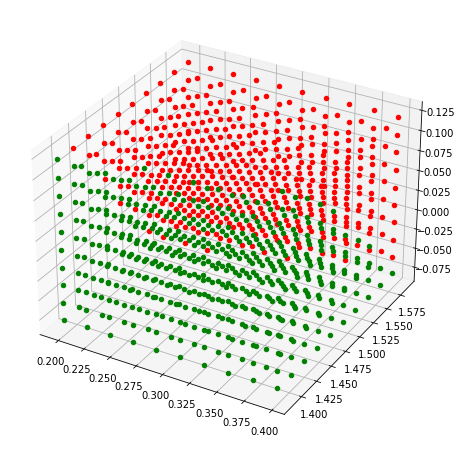

In [133]:
zoom_in(bad_samples[4], [0.1,0.1,0.1,0.1,0.1,0.1])